__временные ряды и модели ARIMA__

Евгений Борисов esborisov@sevsu.ru

Дмитрий Макаров Временные ряды
https://www.dmitrymakarov.ru/intro/time-series-20/

In [1]:
import numpy as np
from numpy import random as rng
import matplotlib.pyplot as plt
import pandas as pd
#from tqdm.auto import tqdm
#tqdm.pandas()
np.set_printoptions(precision=2)

---

https://drive.google.com/file/d/1wMwd2mV_nchXgaz3QTPSBl7Xd-ITsPVQ/view

In [2]:
# читаем данные
url= 'https://drive.google.com/uc?id=1wMwd2mV_nchXgaz3QTPSBl7Xd-ITsPVQ'
df = pd.read_csv(url).convert_dtypes()
display(len(df))
display(df.info())
display(df.describe().T)

159

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             159 non-null    string 
 1   people_employed  159 non-null    Float64
dtypes: Float64(1), string(1)
memory usage: 2.8 KB


None

,count,mean,std,min,25%,50%,75%,max
people_employed,159.0,6787.135849,604.616978,5971.3,6312.25,6528.7,7216.95,7941.6


In [3]:
display(df.sample(3))

,date,people_employed
118,1987-11-01,7330.7
113,1987-06-01,7175.6
37,1981-02-01,6428.1


In [4]:
df['dt'] = pd.to_datetime(df['date'])
df = df.set_index('dt')
df = df[['people_employed']]

display(df.sample(3))

,people_employed
dt,
1986-02-01,6961.9
1979-02-01,6096.2
1983-10-01,6377.5


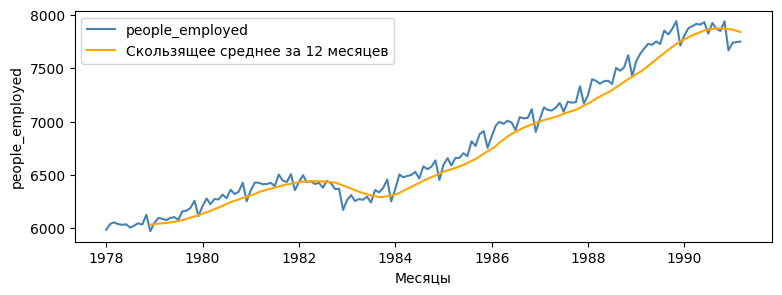

In [5]:
plt.figure(figsize = (9,3))
plt.plot(df, label = 'people_employed', color = 'steelblue')
plt.plot(df.rolling(window = 12).mean(), label = 'Скользящее среднее за 12 месяцев', color = 'orange')
plt.legend(title = '', loc = 'upper left', )
plt.xlabel('Месяцы', )
plt.ylabel('people_employed',)
plt.show()

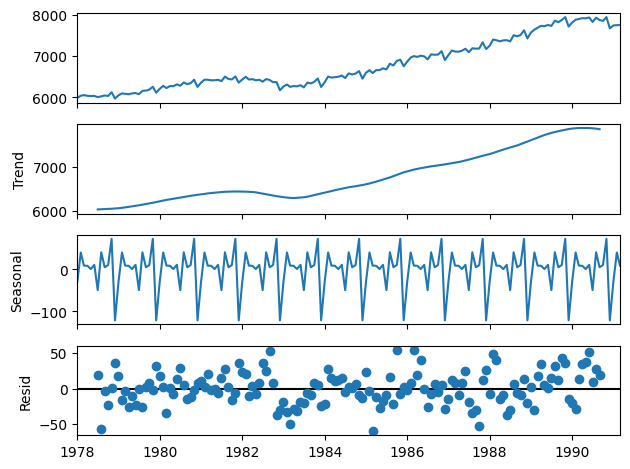

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df)
decompose.plot()
plt.show()

# автоматический подбор параметров модели ARIMA

In [7]:
# разобьём данные на обучающую и тестовую выборки
train = df[:'1988-12']
test = df['1989-01':]

In [8]:
# !pip install pmdarima

In [9]:
# импортируем функцию для автоматического подбора параметров модели ARIMA
from pmdarima import auto_arima

# настроим поиск параметров на обучающей выборке
parameter_search = auto_arima(
    train, 
    start_p=1, 
    start_q=1,
    max_p=3, 
    max_q=3, 
    m=12, 
    start_P=0,
    seasonal=True,
    d=None, 
    D=1, 
    trace=True, 
    error_action ='ignore', 
    suppress_warnings = True,  
    stepwise = True)           

# выведем результат
print(parameter_search.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1171.461, Time=0.24 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1211.208, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1178.266, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1170.593, Time=0.15 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1210.659, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1172.190, Time=0.21 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1172.239, Time=0.48 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1178.938, Time=0.07 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1173.937, Time=0.56 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1171.278, Time=0.06 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=1169.190, Time=0.16 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=1210.079, Time=0.04 sec
 ARIMA(0,1,2)(1,1,1)[12]             : AIC=1170.556, Time=0.23 sec
 ARIMA(0,1,2)(0,1,2)[12]             : AIC=1170.631, Time=0.56 sec
 ARIMA(0,1,2)(1,1,0

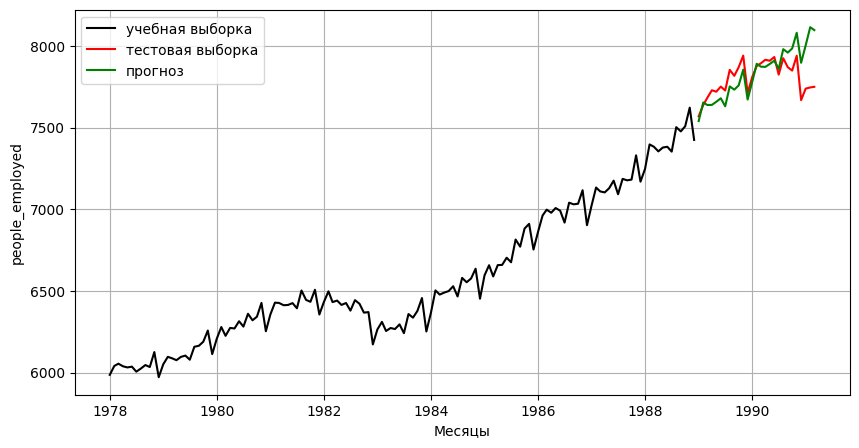

In [11]:
# тестовый прогнозный период начнется с конца обучающего периода
start = len(train)
# и закончится в конце тестового
end = len(train) + len(test) - 1

predictions = parameter_search.predict(start, end)

predictions_ = pd.DataFrame(predictions,index=test.index,columns=['predictions']) 

plt.figure(figsize=(10,5))
plt.plot(train, color = 'black',label='учебная выборка')
plt.plot(test, color = 'red',label='тестовая выборка')
plt.plot(predictions_, color = 'green',  label='прогноз')
plt.ylabel('people_employed')
plt.xlabel('Месяцы')
plt.grid()
plt.legend()
plt.show()